In [192]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 

img_dir = "../imgs/"

def read_image(filename, gray=False):
    im = cv2.imread(filename) 
    return im

def show_images(col, row, images, titles, cmaps=[], scale=2):
    plt.figure(figsize=(row * scale, col * scale))
    cmaps = cmaps if cmaps else [0 for i in images]
    for i in range(len(images)):
        plt.subplot(col, row, i + 1)
        if cmaps[i]: 
            plt.imshow(images[i])
        else:
            plt.imshow(images[i], cmap="gray")
        plt.title(titles[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def invert(img):
    return cv2.bitwise_not(img)

def threshold(img, thresh=0, maxval=255, type=cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU):
    _, bw_img = cv2.threshold(img, thresh, maxval, type=type)
    return bw_img

def dilate(img, kernel_size=3, iterations=3):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_img = cv2.dilate(img, kernel, anchor=(-1, -1), iterations=iterations)
    return dilated_img

def erode(img, kernel_size=3, iterations=4):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    erod_img = cv2.erode(img, kernel, anchor=(-1, -1), iterations=iterations)
    return erod_img

def process_image(filename, effects, titles=[], verbose=True, col=1, row=-1):
    titles = ["Original"] if not titles else titles
    img = read_image(filename)
    images = [img]
    prev_img = img  
    for index, effect in enumerate(effects):
        effect_name = effect[0]
        params = ["prev_img"] + effect[1:]
        params_literal = ", ".join(map(str, params)) 
        expression = f"{effect_name}({params_literal})"
        if len(titles) <= index+1 : 
            titles.append(expression)

        prev_img = eval(expression)
        images.append(prev_img)
    im = cv2.imread(filename)
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    if verbose:
        row = round(len(images)/col) if row == -1 else row
        show_images(col, row, images, titles, scale=3)
    
    return images


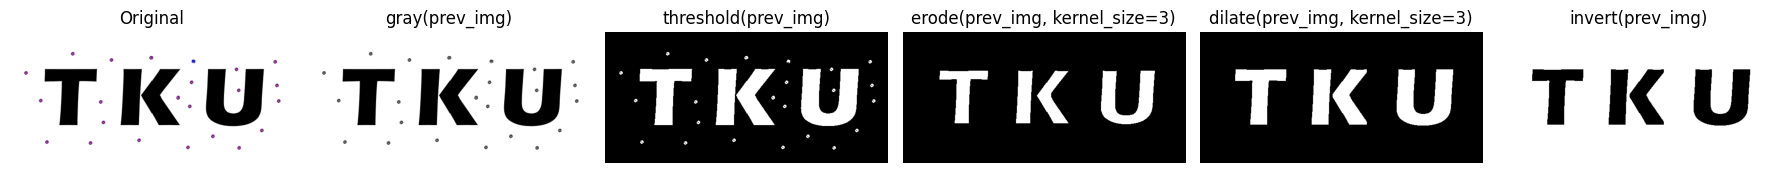

In [193]:
effects = [["gray"],["threshold"], ["erode", "kernel_size=3"], ["dilate", "kernel_size=3"], ["invert"] ]
titles = ["Original"]
images = process_image("../imgs/TKU1.png",  effects, titles)

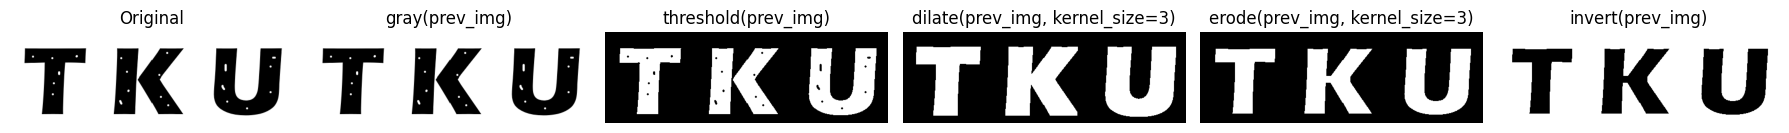

In [194]:

effects = [["gray"],["threshold"], ["dilate", "kernel_size=3"], ["erode", "kernel_size=3"], ["invert"]]
titles = ["Original"]
images = process_image("../imgs/TKU2.png",  effects, titles)

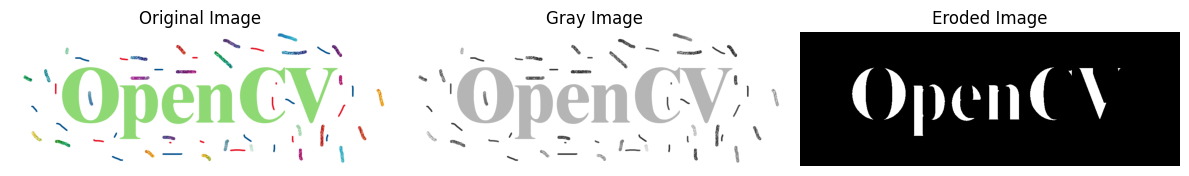

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取影像
im = cv2.imread("../imgs/opencv2.png")  # 替換為你的圖片名稱

# 將影像轉換為灰階
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# 將灰階影像轉換為黑白影像（閾值處理）
_, BW_im = cv2.threshold(gray_im, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 定義內核
kernel = np.ones((3, 3), np.uint8)

# 執行侵蝕
erod_im = cv2.erode(BW_im, kernel, anchor=(0, 0), iterations=4)

# Matplotlib 可視化
plt.figure(figsize=(12, 4))

# 原始影像（BGR 轉 RGB）
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 1)
plt.imshow(im_rgb)
plt.title("Original Image")
plt.axis("off")

# 灰階影像
plt.subplot(1, 3, 2)
plt.imshow(gray_im, cmap="gray")
plt.title("Gray Image")
plt.axis("off")

# 侵蝕後的黑白影像
plt.subplot(1, 3, 3)
plt.imshow(erod_im, cmap="gray")
plt.title("Eroded Image")
plt.axis("off")

# 顯示結果
plt.tight_layout()
plt.show()
